In [18]:
import pandas as pd
import numpy as np

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-07 19:11:06--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.008s  

2025-10-07 19:11:06 (99.9 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



### Load and leave necessary columns

In [6]:
df = pd.read_csv('car_fuel_efficiency.csv')[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

In [15]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,9694,9695,9696,9697,9698,9699,9700,9701,9702,9703
engine_displacement,170.000000,130.000000,170.000000,220.000000,210.000000,190.000000,240.000000,150.000000,250.000000,150.000000,...,220.000000,280.000000,190.000000,220.000000,180.000000,140.000000,180.000000,220.000000,230.000000,270.000000
horsepower,159.000000,97.000000,78.000000,NaN,140.000000,NaN,127.000000,239.000000,174.000000,123.000000,...,176.000000,154.000000,69.000000,110.000000,131.000000,164.000000,154.000000,138.000000,177.000000,140.000000
vehicle_weight,3413.433759,3149.664934,3079.038997,2542.392402,3460.870990,2484.883986,3006.542287,3638.657780,2714.219310,3509.036569,...,2837.652898,3797.309878,3133.329210,2532.987630,3107.427820,2981.107371,2439.525729,2583.471318,2905.527390,2908.043477
model_year,2003.000000,2007.000000,2018.000000,2009.000000,2009.000000,2008.000000,2012.000000,2020.000000,2016.000000,2005.000000,...,2013.000000,2013.000000,2008.000000,2004.000000,2005.000000,2013.000000,2004.000000,2008.000000,2011.000000,2005.000000
fuel_efficiency_mpg,13.231729,13.688217,14.246341,16.912736,12.488369,17.271818,13.210412,12.848884,16.823554,12.298355,...,16.233553,10.542970,13.418128,17.305653,13.933716,15.101802,17.962326,17.186587,15.331551,14.884467


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

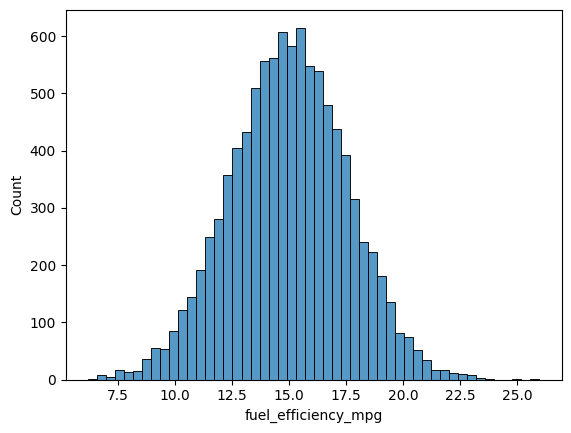

In [9]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)

In [10]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [11]:
df.horsepower.median()

np.float64(149.0)

In [12]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

### Shuffle and split data into train, validation, test datasets

In [49]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

#y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
#y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
#y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [50]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [51]:
len(y_train)

5824

In [52]:
mean_horsepower = df_train.horsepower.mean()

In [53]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [54]:
def prepare_X(df, miss_value=0):
    df = df.copy()
    df_num = df.fillna(miss_value)
    X = df_num.values
    return X

In [66]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

np.float64(0.52)

In [67]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, miss_value=mean_horsepower)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

np.float64(0.5)

### Regularized linear regression

In [59]:
def train_linear_regression_reg(X, y, r=0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [64]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, round(score,2))

0 28.827365475106156 0.52
0.01 24.92683842008767 0.52
0.1 11.239661084961272 0.52
1 1.7315979411936366 0.52
5 0.3638075020692219 0.52
10 0.18306246622306527 0.52
100 0.018418017306977234 0.52


### Different seed values

In [73]:
idx = np.arange(n)
scores = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(s)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    #print(s)
    scores.append(rmse(y_val, y_pred))

In [74]:
scores

[np.float64(0.5206531296292951),
 np.float64(0.5228485491251414),
 np.float64(0.5168340161956984),
 np.float64(0.5256717600315021),
 np.float64(0.5213713709776588),
 np.float64(0.5251461732327269),
 np.float64(0.5255505441129995),
 np.float64(0.5068430916003163),
 np.float64(0.5200613086933334),
 np.float64(0.5140844796208722)]

In [76]:
np.std(scores)

np.float64(0.005638433038914407)

### Question 6

In [78]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)

y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
round(score,3)

np.float64(0.516)